In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy import array
from keras.preprocessing.text import one_hot
from keras.layers.embeddings import Embedding
from numpy import asarray
from numpy import zeros
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/MSc Project/Data/dataset7.csv")

In [ ]:
df

,text,label
0,muslims busted they stole millions in govt ben...,0
1,re why did attorney general loretta lynch plea...,0
2,breaking weiner cooperating with fbi on hillar...,0
3,pin drop speech by father of daughter kidnappe...,0
4,fantastic trumps point plan to reform healthc...,0
...,...,...
2040,why never trumpers must reconsider prof canoes...,0
2041,election crossroads socialism or capitalism te...,0
2042,reasons ill vote for trump school named for mu...,0
2043,our new country women and minorities hit harde...,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


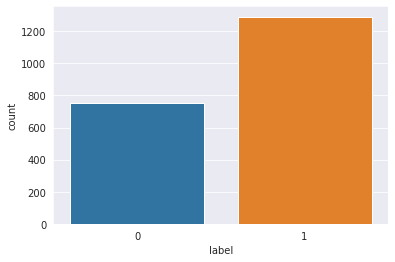

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(df.label)

In [ ]:
X = df['text'].to_list()
y = df['label'].to_list()

In [ ]:
X[:5]

['muslims busted they stole millions in govt benefits print they should pay all the back all the money plus interest the entire family and everyone who came in with them need to be deported asap why did it take two years to bust them \nhere we go again another group stealing from the government and taxpayers a group of somalis stole over four million in government benefits over just  months \nweve reported on numerous cases like this one where the muslim refugeesimmigrants commit fraud by scamming our systemits way out of control more related',
 're why did attorney general loretta lynch plead the fifth why did attorney general loretta lynch plead the fifth barracuda brigade  print the administration is blocking congressional probe into cash payments to iran of course she needs to plead the th she either cant recall refuses to answer or just plain deflects the question straight up corruption at its finest \npercentfedupcom  talk about covering your ass loretta lynch did just that when 

**PRE-PROCESSING OF DATA**

REMOVING URLs

In [ ]:
import re

In [ ]:
# Removing URL's
def remove_url(text):
    return re.sub(r'http\S+', '', text)

In [ ]:
X_url = [remove_url(x) for x in X]

In [ ]:
X_url[:5]

LOWERCASING

In [ ]:
X_lower = [x.lower() for x in X_url]

In [ ]:
X_lower[:5]

['muslims busted they stole millions in govt benefits print they should pay all the back all the money plus interest the entire family and everyone who came in with them need to be deported asap why did it take two years to bust them \nhere we go again another group stealing from the government and taxpayers a group of somalis stole over four million in government benefits over just  months \nweve reported on numerous cases like this one where the muslim refugeesimmigrants commit fraud by scamming our systemits way out of control more related',
 're why did attorney general loretta lynch plead the fifth why did attorney general loretta lynch plead the fifth barracuda brigade  print the administration is blocking congressional probe into cash payments to iran of course she needs to plead the th she either cant recall refuses to answer or just plain deflects the question straight up corruption at its finest \npercentfedupcom  talk about covering your ass loretta lynch did just that when 

REMOVING ALL NON-ALPHABETS

In [ ]:
def cleandata(s):
    replaced = re.sub("[^a-zA-Z' ]+", '', s)
    return replaced

In [ ]:
X_re = [cleandata(x) for x in X_lower]

In [ ]:
X_re[:5]

['muslims busted they stole millions in govt benefits print they should pay all the back all the money plus interest the entire family and everyone who came in with them need to be deported asap why did it take two years to bust them here we go again another group stealing from the government and taxpayers a group of somalis stole over four million in government benefits over just  months weve reported on numerous cases like this one where the muslim refugeesimmigrants commit fraud by scamming our systemits way out of control more related',
 're why did attorney general loretta lynch plead the fifth why did attorney general loretta lynch plead the fifth barracuda brigade  print the administration is blocking congressional probe into cash payments to iran of course she needs to plead the th she either cant recall refuses to answer or just plain deflects the question straight up corruption at its finest percentfedupcom  talk about covering your ass loretta lynch did just that when she pl

In [ ]:
len(X_re[0])

542

STOPWORD REMOVAL

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = set(stopwords.words('english'))

In [ ]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

In [ ]:
X_stop = [remove_stopwords(x) for x in X_re]

In [ ]:
X_stop[:5]

['muslims busted stole millions govt benefits print pay back money plus interest entire family everyone came need deported asap take two years bust go another group stealing government taxpayers group somalis stole four million government benefits months weve reported numerous cases like one muslim refugeesimmigrants commit fraud scamming systemits way control related',
 'attorney general loretta lynch plead fifth attorney general loretta lynch plead fifth barracuda brigade print administration blocking congressional probe cash payments iran course needs plead th either cant recall refuses answer plain deflects question straight corruption finest percentfedupcom talk covering ass loretta lynch plead fifth avoid incriminating payments irancorrupt core attorney general loretta lynch declining comply investigation leading members congress obama administrations secret efforts send iran billion cash earlier year prompting accusations lynch pleaded fifth amendment avoid incriminating payment

In [ ]:
len(X_stop[0])

368

In [ ]:
df = pd.DataFrame(list(zip(X_stop, y)),
               columns =['text', 'label'])

In [ ]:
df.to_csv(r'/content/drive/MyDrive/MSc Project/Data/dataset7_preprocessed.csv', index=False)

In [ ]:
url_saved = '/content/drive/MyDrive/MSc Project/Data/dataset7_preprocessed.csv'
df_save = pd.read_csv(url_saved)
df_save

,text,label
0,muslims busted stole millions govt benefits pr...,0
1,attorney general loretta lynch plead fifth att...,0
2,breaking weiner cooperating fbi hillary email ...,0
3,pin drop speech father daughter kidnapped kill...,0
4,fantastic trumps point plan reform healthcare ...,0
...,...,...
2040,never trumpers must reconsider prof canoes ree...,0
2041,election crossroads socialism capitalism teens...,0
2042,reasons ill vote trump school named munichmass...,0
2043,new country women minorities hit hardest wars ...,0
